# Build and display a connected graph
This notebook builds a connected spatial k-NN graph and optionally prunes edges by trace correlation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from lavian_et_al_2025.graph import build_connected_graph

## Example data
Replace this block with real `coords` and `traces` if available.

In [2]:
rng = np.random.default_rng(7)
n_nodes = 200
coords = rng.normal(size=(n_nodes, 2))
traces = rng.normal(size=(n_nodes, 500))

## Build connected graph

In [5]:
result = build_connected_graph(
    coords,
    traces=traces,
    k=10,
    corr_threshold=0.3,
    ensure_connected=True,
)

edges = result.edges
weights = result.weights
correlations = result.correlations

len(edges), edges[:5]

(281,
 array([[  0, 112],
        [  1,  50],
        [  2, 154],
        [  3, 173],
        [  4,  90]]))

## Display graph
Edges are colored by correlation if `traces` were provided.

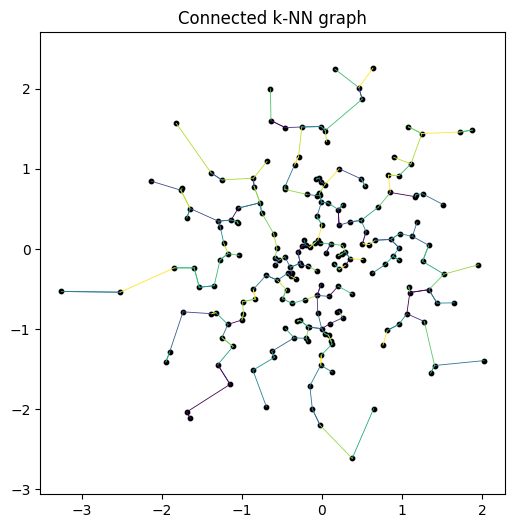

In [7]:
plt.figure(figsize=(6, 6))

if correlations is None:
    for i, j in edges:
        plt.plot(
            [coords[i, 0], coords[j, 0]],
            [coords[i, 1], coords[j, 1]],
            color="#999999",
            linewidth=0.5,
        )
else:
    vmin = np.percentile(correlations, 5)
    vmax = np.percentile(correlations, 95)
    cmap = plt.cm.viridis
    for idx, (i, j) in enumerate(edges):
        c = correlations[idx]
        color = cmap((c - vmin) / (vmax - vmin) if vmax > vmin else 0.5)
        plt.plot(
            [coords[i, 0], coords[j, 0]],
            [coords[i, 1], coords[j, 1]],
            color=color,
            linewidth=0.6,
        )

plt.scatter(coords[:, 0], coords[:, 1], s=10, c="black")
plt.axis("equal")
plt.title("Connected k-NN graph")
plt.show()